# Imports

In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image
from random import randint
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from math import sqrt, ceil, floor, log
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Specify File Paths

In [2]:
# file paths
data_dir = "/kaggle/input/leaf-classification"
output_dir = "/kaggle/working"
images_file = "images.zip"
train_file = "train.csv.zip"
test_file = "test.csv.zip"

# Read Train and Test Data

In [3]:
# read train data 
train_data = pd.read_csv(f"{data_dir}/{train_file}")
# read test data 
test_data = pd.read_csv(f"{data_dir}/{test_file}")

# Data Description

## 1. Train Data

In [4]:
train_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [5]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
train_data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [7]:
margin_stds = train_data.describe().loc["std", "margin1":"margin64"]
shape_stds = train_data.describe().loc["std", "shape1":"shape64"]
texture_stds = train_data.describe().loc["std", "texture1":"texture64"]

In [8]:
print(margin_stds.mean())
print(shape_stds.mean())
print(texture_stds.mean())

0.016879168912621555
0.00029274067959803723
0.02695849946731398


In [9]:
standard_deviations_means = [margin_stds.mean(), shape_stds.mean(), texture_stds.mean()]
features = ["margin", "shape", "texture"]

Text(0, 0.5, 'average standard deviation')

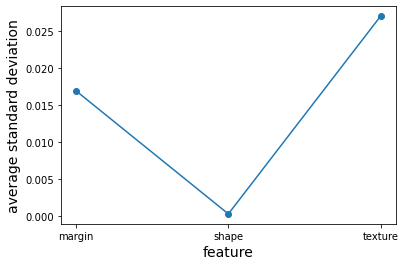

In [10]:
plt.plot(features, standard_deviations_means, marker="o")
plt.xlabel('feature', {"fontsize": 14})
plt.ylabel('average standard deviation', {"fontsize": 14})

### 2. Test Data

In [11]:
test_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [12]:
test_data.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [13]:
test_data.columns

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

# Data Preprocessing

**Utility Functions**

In [14]:
def check_nulls(data):
    # check null data
    columns = data.columns
    null_values_in_columns = []
    total_null_data = 0

    for column in columns:
        null_data_number_in_column = data[column].isnull().values.sum()
        null_values_in_columns.append(null_data_number_in_column)
        total_null_data += null_data_number_in_column
    return null_values_in_columns

def check_duplicates(data):
    # check duplicate data
    return train_data.duplicated().sum()

def check_data_values(data):
    nulls = check_nulls(data)
    dups = check_duplicates(data)
    
    return pd.DataFrame({"Column": data.columns,
              "Null value": nulls,
              "Duplicated rows": ([dups] * len(data.columns))})

In [15]:
check_data_values(train_data)

,Column,Null value,Duplicated rows
0,id,0,0
1,species,0,0
2,margin1,0,0
3,margin2,0,0
4,margin3,0,0
...,...,...,...
189,texture60,0,0
190,texture61,0,0
191,texture62,0,0
192,texture63,0,0


In [16]:
check_data_values(test_data)

,Column,Null value,Duplicated rows
0,id,0,0
1,margin1,0,0
2,margin2,0,0
3,margin3,0,0
4,margin4,0,0
...,...,...,...
188,texture60,0,0
189,texture61,0,0
190,texture62,0,0
191,texture63,0,0


# Data Visualization

**Utility Functions**

In [17]:
def plot_histogram_with_leaf_id(data, title, random_id):
    number_of_intervals = int(sqrt(len(data)))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    plt.title(f"{title} Histogram of Leaf with ID {random_id}", {"fontsize": 12})
    plt.xlabel(f"{title.lower()} value") 
    plt.ylabel('count') 
    plt.hist(data, label="count", bins = number_of_intervals)
    plt.show()
    
def plot_histogram_for_feature(data, title, feature):
    number_of_intervals = int(sqrt(len(data)))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.title(f"{title} Histogram of {feature}", {"fontsize": 12})
    plt.xlabel(f"{title.lower()} value") 
    plt.ylabel('count') 
    plt.hist(data, label="count", bins = number_of_intervals)
    plt.show()
        
def get_leaf_columns_values(data, column_name):
    column_values = []
    column_data = data.loc[:, f"{column_name}1": f"{column_name}64"]

    for column in column_data.columns:
        column_value = column_data[column].values[0]
        column_values.append(column_value)
        
    return column_values 

In [18]:
# extract images
with ZipFile(f"{data_dir}/{images_file}", 'r') as zip: 
    zip.extractall()

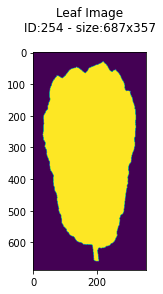

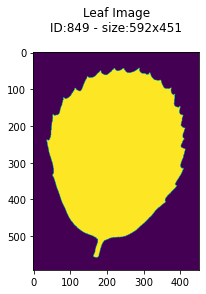

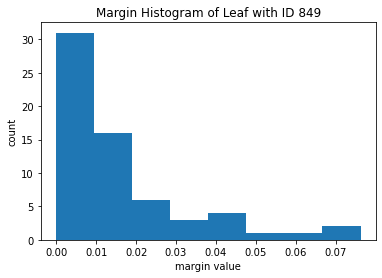

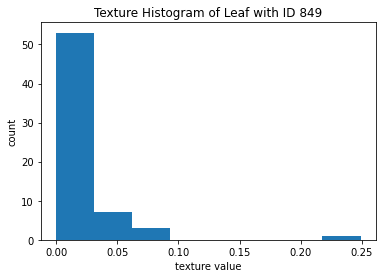

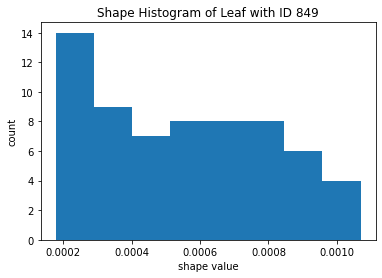

In [19]:
# show some leaf images
for i in range(2):
    random_id = randint(1, 990)
    img = plt.imread(f"{output_dir}/images/{random_id}.jpg")
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    x, y = img.shape
    plt.title(f"Leaf Image\nID:{random_id} - size:{x}x{y}\n", {"fontsize": 12})
    imgplot = plt.imshow(img)
    
    image_data_in_train = train_data[train_data['id'] == random_id]
    
    if len(image_data_in_train) > 0:
        margin_values = get_leaf_columns_values(image_data_in_train, "margin")
        plot_histogram_with_leaf_id(margin_values, "Margin", random_id)
        
        texture_values = get_leaf_columns_values(image_data_in_train, "texture")
        plot_histogram_with_leaf_id(texture_values, "Texture", random_id)
        
        shape_values = get_leaf_columns_values(image_data_in_train, "shape")
        plot_histogram_with_leaf_id(shape_values, "Shape", random_id)

### Relationships between First 3 Margin Values

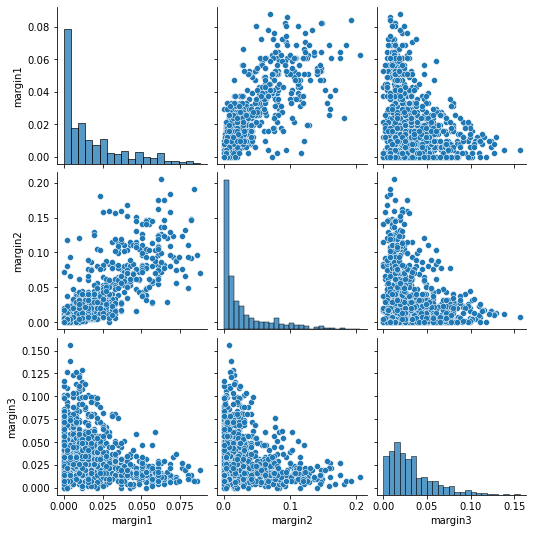

In [20]:
import seaborn as sns
sns.pairplot(train_data.iloc[:, 2:5])
plt.show()

# Data Preparation

**Utility Function**

In [21]:
def split_data(train_data, labels):
    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [22]:
label_encoder = LabelEncoder().fit(train_data.species) 
labels = label_encoder.transform(train_data.species)      # encode species names
classes = list(label_encoder.classes_)                    # save column names for submission
    
print(len(classes), classes)
labels = LabelEncoder().fit_transform(train_data.species) # y (targets)

99 ['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocary

In [23]:
# store test output values
test_y = test_data["id"]

In [24]:
# drop output values
train_data = train_data.drop(['species', 'id'], axis=1)  # X (features)
test_data = test_data.drop(['id'], axis=1)

In [25]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(792, 192) (198, 192) (792,) (198,)


# Classification

Classifiers that will be used are:
1. Random Forests
2. Decision Tree
3. Linear Discriminant Analysis

**Utility Function**

In [26]:
def classify(classifier, train_data, test_data):
    X_train, X_test, y_train, y_test = split_data(train_data, labels)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy >> ", acc_score) 
    
    # Predict Test Set
    test_pred = classifier.predict_proba(test_data)
    
    return (y_pred, test_pred, acc_score)

In [27]:
# for further performance evaluation 
non_discretized_results = []
equal_width_discretized_results = None
equal_freq_discretized_results = None
k_means_discretized_results = None

## 1. Random Forests

In [28]:
classifier = RandomForestClassifier(random_state = 0)
pred = classify(classifier, train_data, test_data)
non_discretized_results.append(pred)

print("Max feature importance >>", np.amax(classifier.feature_importances_))
print("Min feature importance >>", np.amin(classifier.feature_importances_))

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9595959595959596
Max feature importance >> 0.009396357584358243
Min feature importance >> 0.0004384567580308251


## 2. Decision Tree

In [29]:
pred = classify(DecisionTreeClassifier(), train_data, test_data)
non_discretized_results.append(pred)

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.5959595959595959


## 3. Linear Discriminant Analysis

In [30]:
pred = classify(LinearDiscriminantAnalysis(), train_data, test_data)
non_discretized_results.append(pred)

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9646464646464646


# Feature Engineering with Discretization

Discretization is a technique for transforming numerical input or output variables to have discrete ordinal labels.The all data values are real value. In order to improve the accuracies of the classifiers, the columns will be discretized. Discretizers that will be used are:
1. Equal Width Discretizer
2. Equal Frequency Discretizer
3. K Means Discretizer

**Utility Functions**

In [31]:
# to classify the data by all classifiers in one function
def classify_all(train_data, test_data):
    return (classify(RandomForestClassifier(random_state = 0), train_data, test_data),
            classify(DecisionTreeClassifier(), train_data, test_data),
            classify(LinearDiscriminantAnalysis(), train_data, test_data))

In [32]:
def discretize(data, strategy = "uniform", bin_number = 25):
    
    discretizer = KBinsDiscretizer(n_bins=bin_number, encode='ordinal', strategy=strategy)
    data_trans = []
    
    for i, column in enumerate(data):
        column_data = data[column].to_numpy()
        
        # plot histogram of actual data of first 3 columns 
        if i < 3:
            plt.subplot(1, 2, 1)
            plt.title(f"{column}") 
            plt.hist(column_data, bins=bin_number)
        
        # perform discretization
        column_data = column_data.reshape(len(column_data), 1)
        column_trans = discretizer.fit_transform(column_data)
        data_trans.append(pd.DataFrame(column_trans, columns=[f"{column}_trans"]))
        
        # plot histogram of transformed data of first 3 columns 
        if i < 3:
            plt.subplot(1, 2, 2)
            plt.title(f"{column}_trans") 
            plt.hist(column_trans, bins=bin_number)
            plt.show()
        
    # concat discretized columns
    discretized_data = pd.concat(data_trans, axis=1)
    return discretized_data

## 1. Equal Width Discretizer

In [33]:
sqrt_bin_number_train = ceil(sqrt(len(train_data))) # Square-root choice
sturges_bin_number_train = ceil(log(len(train_data), 2)) + 1 # Sturges' formula
avg_bin_number_train = (sqrt_bin_number_train + sturges_bin_number_train) // 2

sqrt_bin_number_test = ceil(sqrt(len(test_data))) # Square-root choice
sturges_bin_number_test = ceil(log(len(test_data), 2)) + 1 # Sturges' formula
avg_bin_number_test = int(sqrt_bin_number_test + sturges_bin_number_test) // 2

print(sqrt_bin_number_train, sturges_bin_number_train, avg_bin_number_train)
print(sqrt_bin_number_test, sturges_bin_number_test, avg_bin_number_test)

32 11 21
25 11 18


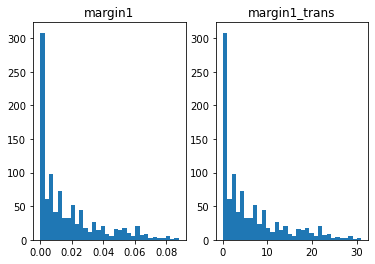

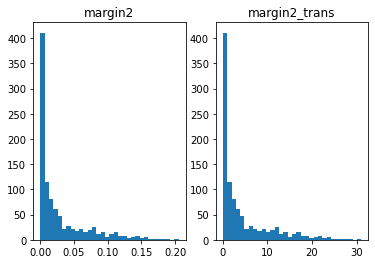

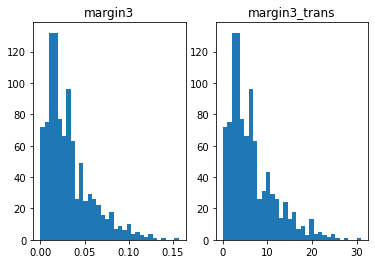

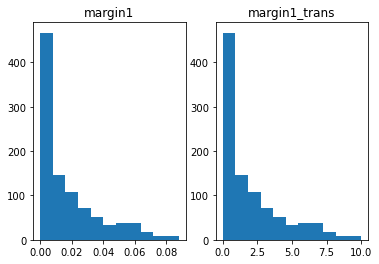

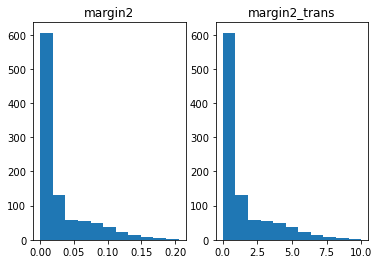

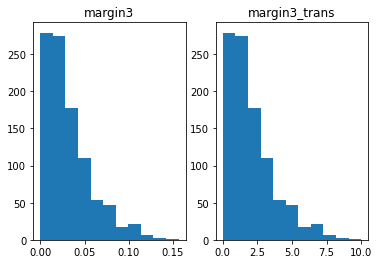

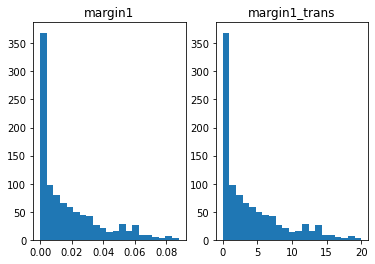

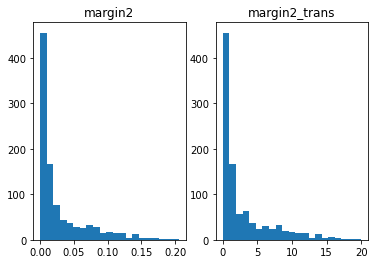

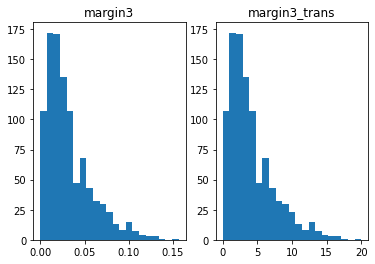

In [34]:
discretized_train_data_sqrt_bin = discretize(train_data, bin_number=sqrt_bin_number_train)
discretized_train_data_sturges_bin = discretize(train_data, bin_number=sturges_bin_number_train)
discretized_train_data_avg_bin = discretize(train_data, bin_number=avg_bin_number_train)

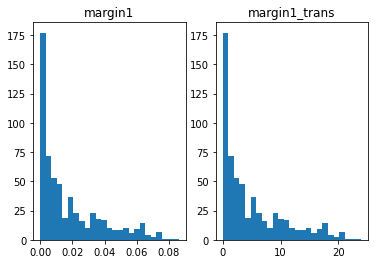

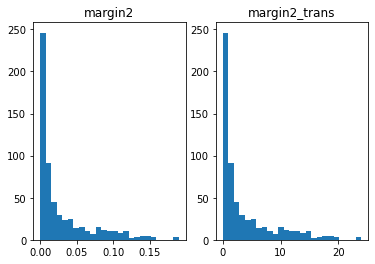

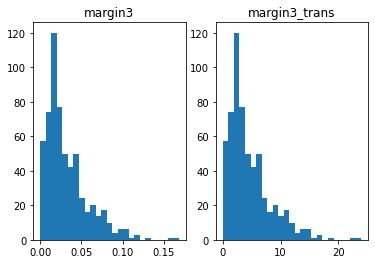

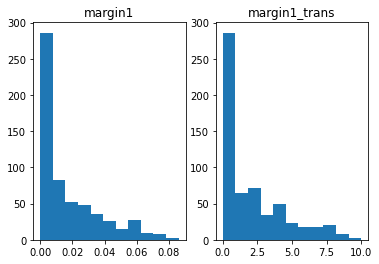

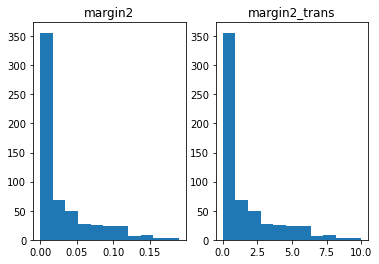

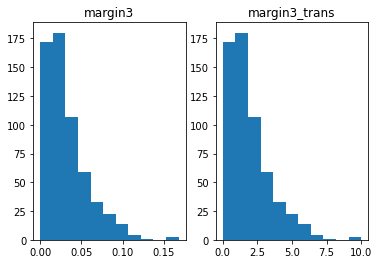

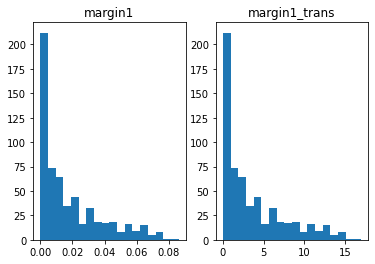

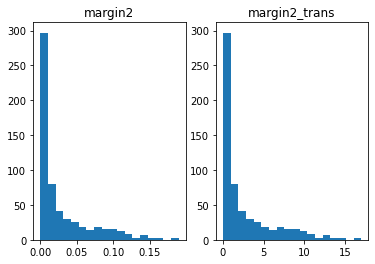

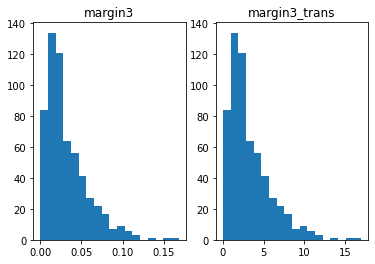

In [35]:
discretized_test_data_sqrt_bin = discretize(test_data, bin_number=sqrt_bin_number_test)
discretized_test_data_sturges_bin = discretize(test_data, bin_number=sturges_bin_number_test)
discretized_test_data_avg_bin = discretize(test_data, bin_number=avg_bin_number_test)

In [36]:
discretized_train_data_avg_bin.head()
discretized_test_data_avg_bin.head()

,margin1_trans,margin2_trans,margin3_trans,margin4_trans,margin5_trans,margin6_trans,margin7_trans,margin8_trans,margin9_trans,margin10_trans,...,texture55_trans,texture56_trans,texture57_trans,texture58_trans,texture59_trans,texture60_trans,texture61_trans,texture62_trans,texture63_trans,texture64_trans
0,4.0,0.0,8.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,...,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
1,1.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,7.0,5.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,5.0
2,0.0,0.0,0.0,2.0,7.0,0.0,4.0,0.0,2.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0,0.0,1.0
4,0.0,0.0,1.0,1.0,7.0,0.0,2.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,2.0,0.0


In [37]:
classification_results = {}
classification_results["sqrt"] = classify_all(discretized_train_data_sqrt_bin, discretized_test_data_sqrt_bin)
classification_results["sturges"] = classify_all(discretized_train_data_sturges_bin, discretized_test_data_sturges_bin)
classification_results["avg"] = classify_all(discretized_train_data_avg_bin, discretized_test_data_avg_bin)

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9545454545454546
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6464646464646465
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9646464646464646
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9747474747474747
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6060606060606061
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.98989898989899
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.98989898989899
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.601010101010101
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9696969696969697


In [38]:
# see results
classification_results

{'sqrt': ((array([48, 61, 44, 95, 75, 74, 72, 57,  9, 64, 71, 94, 93, 35, 93, 46, 31,
          11, 71, 76, 30, 27, 19, 61, 30, 76, 75,  1, 56, 64, 86, 25, 94, 55,
          97, 10,  1,  7, 62, 58, 23, 13, 63, 43, 61, 88, 91,  8, 85, 63, 59,
          46, 27, 12, 49, 17,  4, 61, 76, 37, 69, 10,  9, 73, 41,  1,  9, 22,
          51, 70, 35, 31, 66, 34, 34, 82, 92,  3, 88, 57, 40, 27, 24, 25, 98,
          47, 74, 24, 67, 86, 48, 58, 73, 28, 26, 86,  2, 18, 77, 34, 94, 79,
          98, 13, 62, 63, 95, 27, 88, 20, 92, 55, 60, 73, 87, 89, 50,  7, 32,
          41, 59, 35,  5, 96, 42, 81, 42, 37, 46, 61, 52, 75, 67, 82, 32, 24,
          45, 23, 41, 50, 42, 23, 77, 82, 96, 87, 50, 22, 37, 23, 39, 78, 28,
          76, 51,  8, 85, 80, 32,  5, 86, 75, 88, 80, 36, 46, 34, 27,  4,  2,
          49,  8, 41, 46,  9, 61, 78, 33, 60,  0, 66, 47, 26, 84, 51, 45, 89,
          94,  8,  1, 91, 17, 21, 88, 52,  8, 41, 65]),
   array([[0.  , 0.  , 0.  , ..., 0.  , 0.04, 0.  ],
          [0.  , 0.  , 0.

In [39]:
equal_width_discretized_results = classification_results

## 2. Equal Frequency Discretizer

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


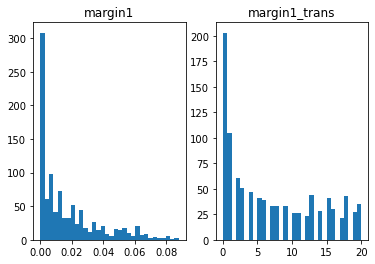

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


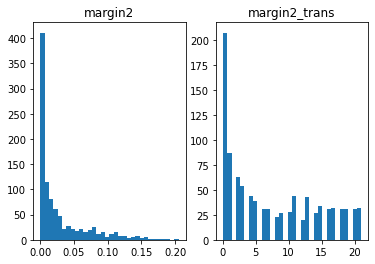

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


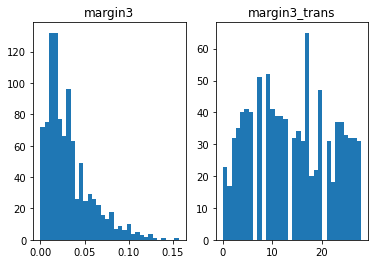

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

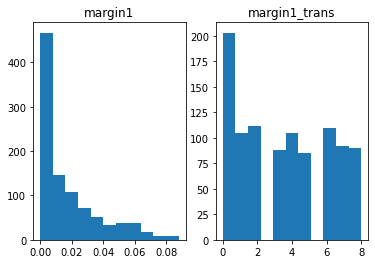

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


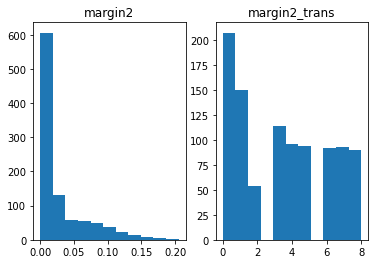

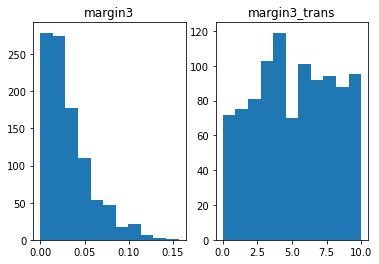

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


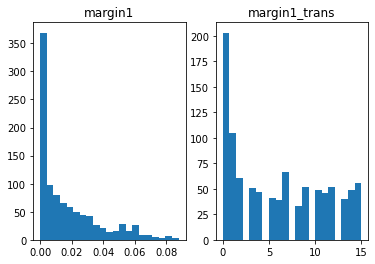

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


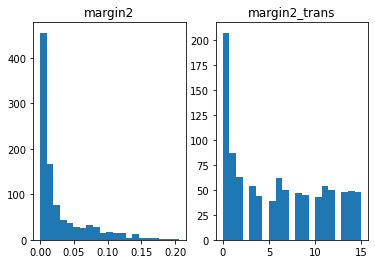

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


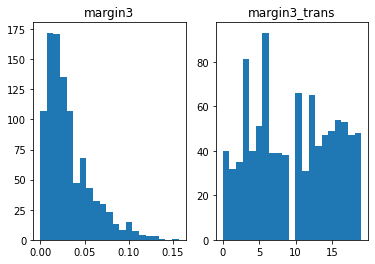

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

In [40]:
discretized_train_data_sqrt_bin = discretize(train_data, strategy="quantile", bin_number=sqrt_bin_number_train)
discretized_train_data_sturges_bin = discretize(train_data, strategy="quantile", bin_number=sturges_bin_number_train)
discretized_train_data_avg_bin = discretize(train_data, strategy="quantile", bin_number=avg_bin_number_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


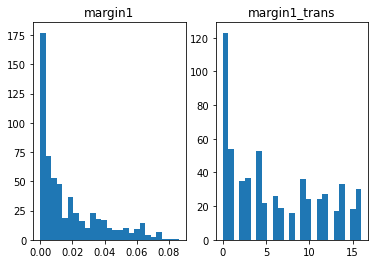

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


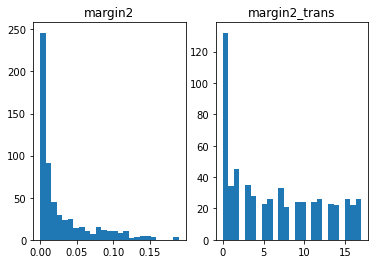

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


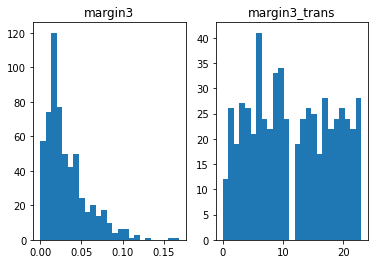

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


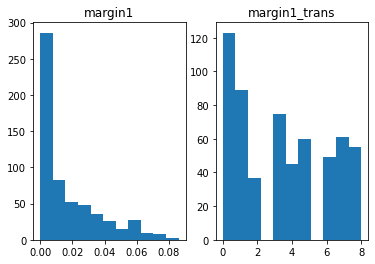

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


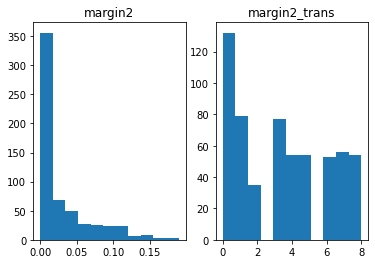

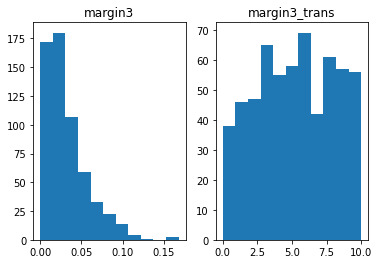

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


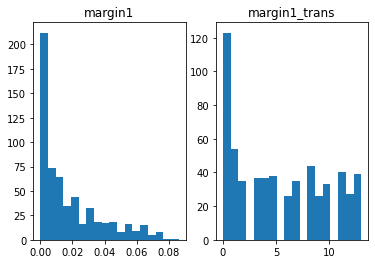

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


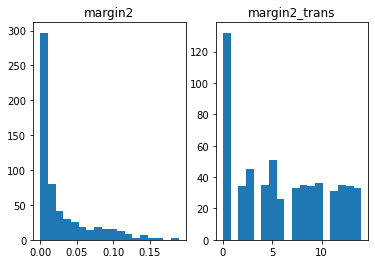

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


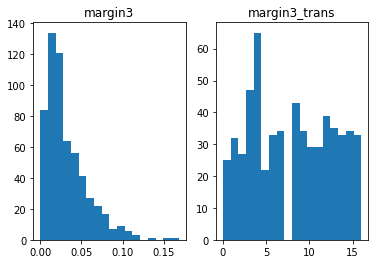

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

In [41]:
discretized_test_data_sqrt_bin = discretize(test_data, strategy="quantile", bin_number=sqrt_bin_number_test)
discretized_test_data_sturges_bin = discretize(test_data, strategy="quantile", bin_number=sturges_bin_number_test)
discretized_test_data_avg_bin = discretize(test_data, strategy="quantile", bin_number=avg_bin_number_test)

In [42]:
discretized_train_data_avg_bin.head()
discretized_test_data_avg_bin.head()

,margin1_trans,margin2_trans,margin3_trans,margin4_trans,margin5_trans,margin6_trans,margin7_trans,margin8_trans,margin9_trans,margin10_trans,...,texture55_trans,texture56_trans,texture57_trans,texture58_trans,texture59_trans,texture60_trans,texture61_trans,texture62_trans,texture63_trans,texture64_trans
0,8.0,5.0,15.0,6.0,2.0,5.0,3.0,0.0,3.0,10.0,...,2.0,0.0,8.0,1.0,9.0,0.0,0.0,0.0,2.0,13.0
1,4.0,4.0,14.0,5.0,2.0,5.0,4.0,0.0,8.0,10.0,...,0.0,0.0,6.0,2.0,8.0,0.0,0.0,1.0,10.0,12.0
2,0.0,0.0,0.0,10.0,11.0,0.0,10.0,0.0,6.0,3.0,...,9.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
3,0.0,0.0,3.0,6.0,8.0,0.0,2.0,0.0,2.0,1.0,...,4.0,3.0,3.0,8.0,8.0,0.0,0.0,10.0,0.0,4.0
4,1.0,0.0,4.0,5.0,11.0,0.0,4.0,0.0,3.0,0.0,...,0.0,4.0,9.0,5.0,15.0,0.0,0.0,4.0,5.0,4.0


In [43]:
classification_results = {}
classification_results["sqrt"] = classify_all(discretized_train_data_sqrt_bin, discretized_test_data_sqrt_bin)
classification_results["sturges"] = classify_all(discretized_train_data_sturges_bin, discretized_test_data_sturges_bin)
classification_results["avg"] = classify_all(discretized_train_data_avg_bin, discretized_test_data_avg_bin)

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9595959595959596
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.494949494949495
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.98989898989899
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9747474747474747
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6818181818181818
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.98989898989899
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9494949494949495
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6464646464646465
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9848484848484849


In [44]:
# see results
classification_results

{'sqrt': ((array([62, 28, 30, 76, 17, 29, 71,  8,  6, 25, 35, 93, 18, 50, 84,  7, 42,
          21, 85, 49, 53, 10, 27, 52, 38, 35, 41, 47,  7, 76, 14, 79, 64, 78,
          58, 60, 76, 87, 88, 55, 12,  4, 86, 65, 82, 47, 58, 57, 76, 96, 26,
          67, 66, 40, 20, 29, 66, 91, 23, 93, 47, 71, 62, 95, 15, 39, 35, 32,
          87, 58,  0, 87, 13, 63, 77, 84, 27, 65,  1,  3, 22, 95, 37, 37, 67,
          36, 64, 12, 82, 75, 57, 19, 56, 56, 23, 78, 81, 94, 28, 26, 36,  5,
          37, 11, 47, 15, 40, 48, 31, 13, 16, 91, 67, 54, 38, 74, 90, 43, 24,
          20, 47, 10, 38, 89,  9, 28, 40,  9, 29, 73, 30, 77,  2, 86, 65, 21,
          45, 53, 18, 93, 91, 96, 93, 88, 91, 69, 23, 19, 52, 31, 81, 93, 56,
          94, 85, 26,  5,  9, 88, 84,  1, 84, 24, 53, 18, 44, 24, 95, 34, 79,
          53,  2, 27, 72, 98,  3, 39, 53, 93, 43, 97, 97, 56, 29, 15, 44, 59,
          68, 70, 62, 88, 45, 37,  1, 69, 14, 42, 53]),
   array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
          [0.  , 0.  , 0.

In [45]:
equal_freq_discretized_results = classification_results

## 3. K Means Discretizer

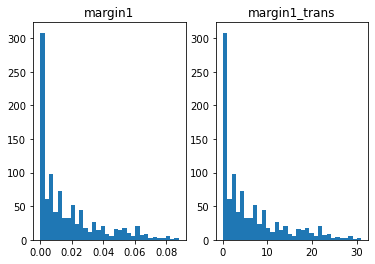

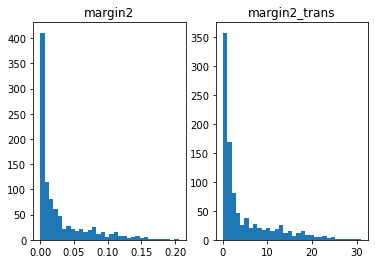

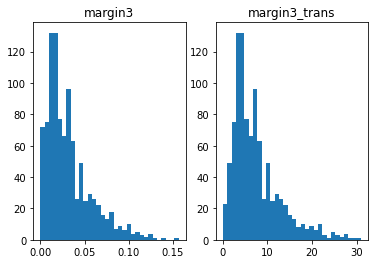

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of 

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of 

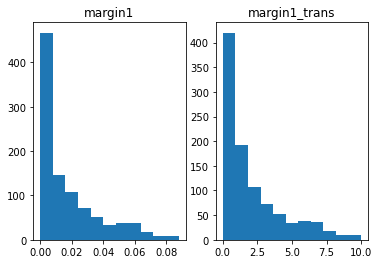

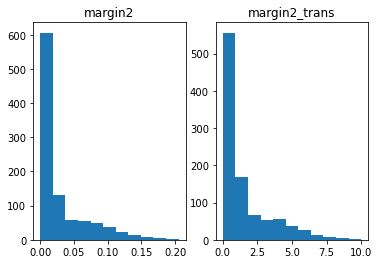

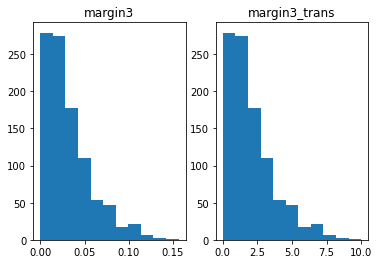

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of b

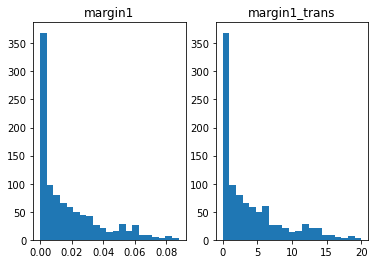

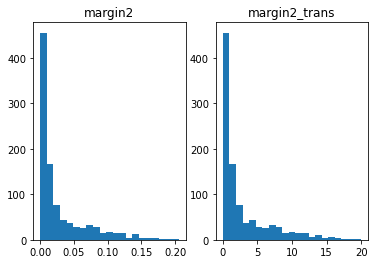

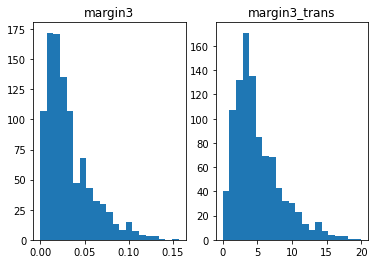

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of b

In [46]:
discretized_train_data_sqrt_bin = discretize(train_data, strategy="kmeans", bin_number=sqrt_bin_number_train)
discretized_train_data_sturges_bin = discretize(train_data, strategy="kmeans", bin_number=sturges_bin_number_train)
discretized_train_data_avg_bin = discretize(train_data, strategy="kmeans", bin_number=avg_bin_number_train)

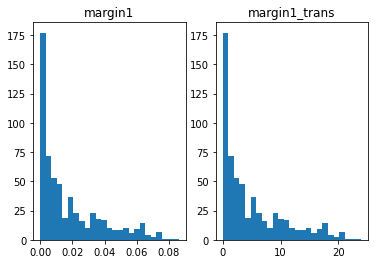

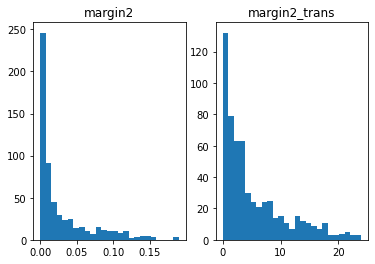

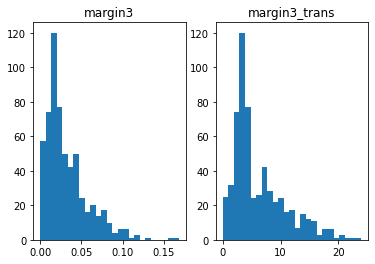

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of 

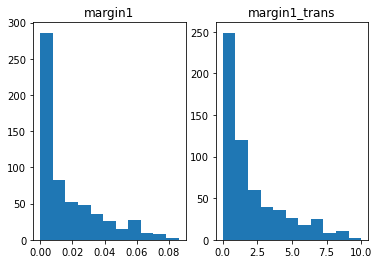

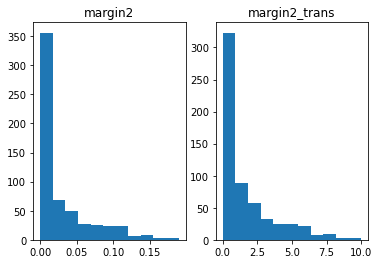

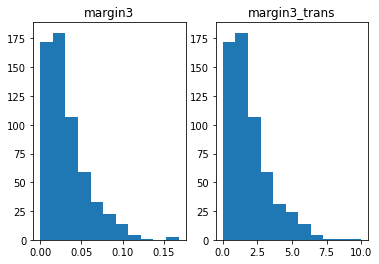

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of 

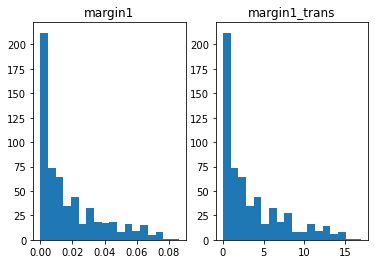

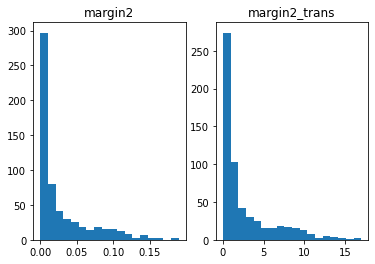

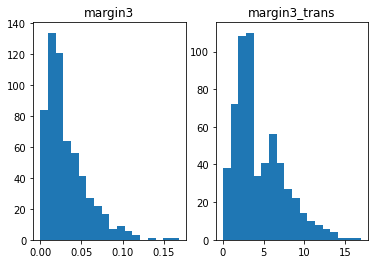

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of 

In [47]:
discretized_test_data_sqrt_bin = discretize(test_data, strategy="kmeans", bin_number=sqrt_bin_number_test)
discretized_test_data_sturges_bin = discretize(test_data, strategy="kmeans", bin_number=sturges_bin_number_test)
discretized_test_data_avg_bin = discretize(test_data, strategy="kmeans", bin_number=avg_bin_number_test)

In [48]:
discretized_train_data_avg_bin.head()
discretized_test_data_avg_bin.head()

,margin1_trans,margin2_trans,margin3_trans,margin4_trans,margin5_trans,margin6_trans,margin7_trans,margin8_trans,margin9_trans,margin10_trans,...,texture55_trans,texture56_trans,texture57_trans,texture58_trans,texture59_trans,texture60_trans,texture61_trans,texture62_trans,texture63_trans,texture64_trans
0,4.0,1.0,10.0,1.0,0.0,1.0,1.0,0.0,3.0,6.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2.0,9.0
1,1.0,0.0,8.0,1.0,0.0,1.0,1.0,0.0,10.0,6.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,9.0,8.0
2,0.0,0.0,0.0,2.0,7.0,0.0,4.0,0.0,4.0,2.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0,...,1.0,3.0,1.0,4.0,2.0,0.0,0.0,8.0,0.0,2.0
4,0.0,0.0,2.0,1.0,7.0,0.0,2.0,0.0,3.0,0.0,...,0.0,9.0,4.0,1.0,8.0,0.0,0.0,1.0,3.0,2.0


In [49]:
classification_results = {}
classification_results["sqrt"] = classify_all(discretized_train_data_sqrt_bin, discretized_test_data_sqrt_bin)
classification_results["sturges"] = classify_all(discretized_train_data_sturges_bin, discretized_test_data_sturges_bin)
classification_results["avg"] = classify_all(discretized_train_data_avg_bin, discretized_test_data_avg_bin)

(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9848484848484849
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6666666666666666
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9797979797979798
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9494949494949495
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.6161616161616161
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9797979797979798
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.9696969696969697
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.5656565656565656
(792, 192) (198, 192) (792,) (198,)
Accuracy >>  0.98989898989899


In [50]:
# see results
classification_results

{'sqrt': ((array([42, 75, 23, 20, 64, 31,  7, 90, 39, 83, 91, 73, 21, 91, 11,  2, 11,
          58, 86, 74, 39, 33, 16, 59, 55, 42, 20, 27, 79, 68, 35, 75, 72, 90,
          41, 62, 50, 30, 77, 20, 94, 52, 88, 14, 63, 97, 43, 93,  4, 16, 68,
          83, 76, 85, 79, 74, 42, 30, 22, 34, 78, 34, 72, 52, 84, 62, 51, 74,
          16, 49,  1, 43, 91, 83, 39, 28, 94, 34, 50, 66, 55, 96, 52, 10, 65,
          44,  5, 14, 17, 25,  9, 78, 89, 98,  9, 50, 29, 50, 18,  1, 83,  2,
          66,  1, 89, 57, 33, 43, 25, 19,  0, 84, 32, 64, 44, 54, 88, 23, 17,
          36, 57, 24, 10, 54, 27, 71, 75, 46, 82, 47, 24,  1, 38, 46, 53, 34,
          51, 66, 24, 17, 97, 55, 72, 30, 70, 18, 55, 16, 90, 47, 63, 47,  8,
          91, 98, 70, 64, 14, 97, 12,  6, 35, 86, 66,  3, 38,  8, 57, 32, 41,
          40, 54, 55, 54, 85, 45, 27, 50,  5, 37, 72, 61, 22, 92, 45,  0, 46,
          65, 96, 25, 10, 63, 13, 35, 17, 23, 40, 32]),
   array([[0.  , 0.01, 0.  , ..., 0.  , 0.01, 0.  ],
          [0.  , 0.  , 0.

In [51]:
k_means_discretized_results = classification_results

# Performance Evaluation

**Utility Functions**

In [52]:
# to label the value in the bar 
def autolabel(ax, rects, values):
    for id, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(values[id]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),textcoords="offset points",
                    ha='center', va='bottom')
   
# plot grouped bar chart
def plot_acc_score_graph(accuracy_scores, train_bin_num, test_bin_num):

    labels = ['Random Forests', 'Decision Trees', 'LDA']

    x = np.arange(len(labels))  # the label locations
    width = 0.2125  # the width of the bars

    fig, ax = plt.subplots()

    # Add some text for labels, title and custom x-axis tick labels, etc.
    title = f'Accuracy Scores by Classifier and Discretizer\n\
            train data bin number = {train_bin_num} - test data bin number = {test_bin_num}'
    ax.set_ylabel('Accuracy Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    x = x - (3*width/2)                    
    for accuracy_score, label in accuracy_scores:
        rect = ax.bar(x, accuracy_score, width, label=label)
        autolabel(ax, rect, accuracy_score)
        x += width

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Performance with Square Root Choice

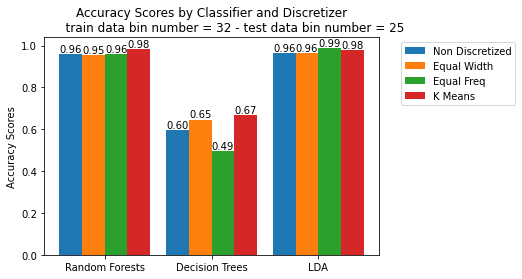

In [53]:
accuracy_scores = [
                    ([res[2] for res in non_discretized_results], 'Non Discretized'),
                    ([res[2] for res in equal_width_discretized_results["sqrt"]], 'Equal Width'),
                    ([res[2] for res in equal_freq_discretized_results["sqrt"]], 'Equal Freq'),
                    ([res[2] for res in k_means_discretized_results["sqrt"]], 'K Means')]
plot_acc_score_graph(accuracy_scores, sqrt_bin_number_train, sqrt_bin_number_test)

## Performance with Sturges' Formula

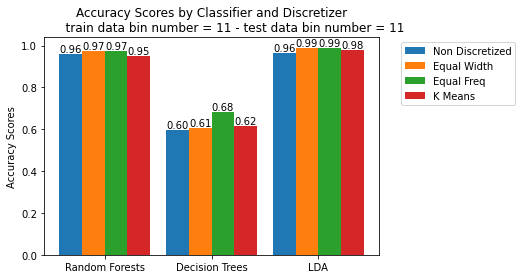

In [54]:
accuracy_scores = [
                    ([res[2] for res in non_discretized_results], 'Non Discretized'),
                    ([res[2] for res in equal_width_discretized_results["sturges"]], 'Equal Width'),
                    ([res[2] for res in equal_freq_discretized_results["sturges"]], 'Equal Freq'),
                    ([res[2] for res in k_means_discretized_results["sturges"]], 'K Means')]
plot_acc_score_graph(accuracy_scores, sturges_bin_number_train, sturges_bin_number_test)

## Performance with Average Value

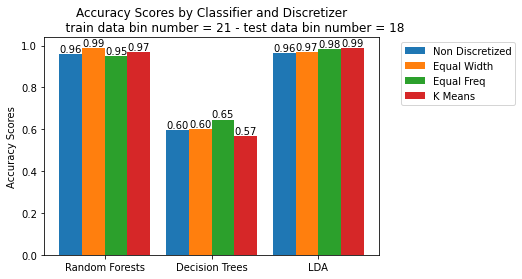

In [55]:
accuracy_scores = [
                    ([res[2] for res in non_discretized_results], 'Non Discretized'),
                    ([res[2] for res in equal_width_discretized_results["avg"]], 'Equal Width'),
                    ([res[2] for res in equal_freq_discretized_results["avg"]], 'Equal Freq'),
                    ([res[2] for res in k_means_discretized_results["avg"]], 'K Means')]
plot_acc_score_graph(accuracy_scores, avg_bin_number_train, avg_bin_number_test)

# Predict Test Data

In [56]:
# choose one of the best classification_results
y_pred, test_pred, acc_score = k_means_discretized_results["avg"][2]

In [57]:
test_pred

array([[5.42553000e-123, 6.57038111e-219, 7.01331100e-186, ...,
        1.15626362e-135, 2.73883971e-109, 2.57738061e-148],
       [6.33441286e-121, 2.13216174e-198, 2.52728399e-120, ...,
        3.76418215e-063, 7.60864784e-158, 1.48211056e-086],
       [1.36267953e-122, 1.00000000e+000, 7.68713797e-155, ...,
        2.79979304e-165, 1.20541000e-205, 5.78366734e-086],
       ...,
       [1.80195352e-079, 1.94504933e-185, 1.02087055e-140, ...,
        9.77915368e-084, 1.39358593e-108, 3.80534648e-081],
       [3.09523573e-123, 1.50088294e-192, 5.06935110e-121, ...,
        1.32560101e-079, 6.66719051e-175, 2.23207754e-104],
       [4.70379026e-177, 8.17271533e-232, 1.01306112e-147, ...,
        5.30927030e-118, 1.37862206e-188, 5.35961525e-123]])

In [58]:
# submission dataframe
submission = pd.DataFrame(test_pred, columns=classes)
submission.insert(0, 'id', test_y)
submission.reset_index()

,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,5.425530e-123,6.570381e-219,7.013311e-186,3.389323e-75,0.000000e+00,6.984917e-148,4.025166e-179,2.593528e-141,...,9.598514e-219,7.164215e-109,2.337423e-157,8.856121e-130,2.914373e-131,3.512852e-114,2.513573e-184,1.156264e-135,2.738840e-109,2.577381e-148
1,1,7,6.334413e-121,2.132162e-198,2.527284e-120,3.802568e-51,9.754691e-309,1.123525e-105,4.856974e-75,2.778598e-99,...,5.175250e-161,4.235892e-87,9.719176e-150,2.059154e-103,7.723246e-129,4.963357e-72,1.579463e-142,3.764182e-63,7.608648e-158,1.482111e-86
2,2,9,1.362680e-122,1.000000e+00,7.687138e-155,5.746743e-107,1.785340e-82,7.910748e-152,1.307019e-228,3.007385e-93,...,1.411809e-140,2.735154e-143,5.683685e-189,7.421507e-120,1.666054e-122,3.498800e-98,1.677670e-84,2.799793e-165,1.205410e-205,5.783667e-86
3,3,12,1.561620e-84,8.488630e-83,1.456343e-185,4.796721e-76,3.691577e-233,2.094579e-146,1.063473e-132,2.970547e-86,...,1.025764e-153,4.683647e-131,1.222916e-149,1.212638e-102,1.146392e-88,6.235297e-50,8.568466e-42,3.348981e-127,3.611907e-181,7.881893e-44
4,4,13,8.174323e-100,3.098813e-154,1.479854e-185,1.899010e-123,6.844736e-255,1.898472e-174,2.829658e-142,3.750958e-103,...,3.475047e-112,1.842101e-144,2.808077e-139,2.025091e-117,4.613767e-81,1.297882e-73,1.440240e-72,3.292624e-137,1.172468e-200,2.344095e-124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,1576,1.243449e-128,1.000000e+00,2.234829e-188,3.787732e-133,3.944454e-76,3.224839e-208,2.211085e-252,1.442338e-125,...,4.963894e-162,6.152249e-165,6.029684e-193,8.032602e-140,3.358152e-149,1.526079e-121,5.766279e-85,1.799868e-198,3.627044e-234,1.707742e-110
590,590,1577,4.107908e-86,1.171709e-186,1.863490e-210,2.002590e-72,3.972981e-295,8.733334e-137,9.045151e-155,3.037026e-63,...,1.631550e-154,8.347003e-114,1.222648e-120,2.024213e-89,3.794803e-40,2.143404e-50,1.190627e-108,1.757789e-144,1.042122e-174,5.801148e-76
591,591,1579,1.801954e-79,1.945049e-185,1.020871e-140,9.175136e-46,2.438536e-286,5.719726e-114,3.309850e-150,5.826570e-101,...,2.365327e-174,9.708880e-100,4.751128e-93,2.481616e-86,1.177170e-88,4.920606e-89,1.784462e-153,9.779154e-84,1.393586e-108,3.805346e-81
592,592,1580,3.095236e-123,1.500883e-192,5.069351e-121,2.051164e-57,1.407250e-270,6.510468e-118,1.713006e-120,5.897149e-58,...,3.519970e-139,1.415131e-68,1.430952e-152,1.608110e-57,1.637143e-99,1.393450e-71,1.630461e-143,1.325601e-79,6.667191e-175,2.232078e-104


In [ ]:
# export 
submission.to_csv('submission.csv', index = False)
submission.head()